In [88]:
def toggle_cell_code(button_id):
    """
    Adds a button to toggle (show/hide) the code cell but not the output. 
    
    Parameters
    ----------
    button_id : str
        An identifier for cells that will hide/show when button is pressed.
    """
    
    from IPython.display import display_html
    my_html = '''
    <button type="button" id="%s" onclick="code_toggle('%s')">Codigo</button>
    <script>
    function code_toggle(my_id) {
        // get the parent element for the cell code and output
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    // get the cell code and toggle its value
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)

toggle_cell_code("un_string_unico_y_reconocible")

Codigo

In [131]:
toggle_cell_code("un0")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import re
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = pd.read_csv('medmal_pos.csv')

Codigo

## CRISP-DM - Negligencia Médica

#### [**Link Video**](https://youtu.be/umT_3_XHJmw)

----------------------------------------------------------------------------------------------------
Duvan Camilo Manrique Vargas
----------------------------------------------------------------------------------------------------


### __Entendimiento del negocio__

Dentro de las aseguradoras existen diferentes áreas que desempeñan funciones específicas las cuales permiten que la compañía pueda desempeñarse en el mercado. 

De las áreas mas importantes se pueden encontrar la **comercial** que es encargada de atraer nuevos clientes, retener a los actuales y desarrollar estrategias para alcanzar diferentes segmentos de mercado, **tecnología** que incluye la infraestructura para agilizar procesos los cuales resultan vitales para la agilidad de las obligaciones y la satisfacción de los clientes. EL área de **reclamaciones** es encargada de gestionar los reclamos por siniestros, detectar fraudes y asignar costos (una reserva inicial) a los reportes de siniestros. Entre otras, se encuentra el área de **actuaria** la cual cumple dos principales y muy importantes roles:   


Por un lado, se encuentra el área de **pricing** encargada de tarificar y asignar el e precio o la prima a los productos, dependiendo el seguro se tarifica de forma diferentes, sin embargo, la más apropiada y la que se suele usar es mediante frecuencia/severidad. Los valores de las primas deben quedar tarifados de forma tal que no sean muy altos para que el producto sea competitivo, pero también no muy baja para que no haya insuficiencia de prima. 

De forma paralela existe también el área que se encarga de calculo de reservas, estas se deben calcular regulatoriamente, por normativa las aseguradoras deben asegurar la solvencia de la compañía y tener el dinero suficiente para cubrir los siniestros. 
Dependiendo el país, los tipos de productos o incluso el nicho de mercado; la forma en la que las reservas se calcula puede variar. 

Del conjunto de reservas algunas de las más comunes son:

- ___Reservas de Siniestros avisados___: Estas reservas se establecen para cubrir los costos esperados de siniestros que ya han ocurrido, pero aún no se han liquidado completamente. Al momento de reportar un siniestro, la compañía estima el valor de lo que puede costar y lo reserva en sus cuentas.  

- ___Reserva de siniestro catastróficos___: Estas reservas son una precaución necesaria ya que los siniestros catastróficos pueden generar pérdidas financieras masivas que podrían superar con creces las reservas habituales. Aunque son muy comunes, los cargos por estas reservas puedes incrementar si los asegurados se encuentran en lugares de mayor exposición a siniestros naturales como huracanes, volcanes o terremotos. 

- ___Reserva matemática___: la reserva matemática se refiere a la cantidad de dinero que la compañía de seguros debe reservar para cumplir con los compromisos futuros de pagar pólizas de seguros de vida.

- ___Reservas de Siniestros incurridos pero no reportados (IBNR)___: son aquellos siniestros que ya han ocurrido pero que no han sido reportados a la compañía de seguros. Ya que no existe una caducidad en el reclamo del siniestro, la aseguradora incluso después de un tiempo de haber ocurrido el siniestro está en la obligación de cubrirlo. 

#### Vida de una Reserva

Un contrato de seguros establece un acuerdo en el cual un asegurado realiza pagos a una aseguradora. A cambio, la aseguradora asume el riesgo y proporcionar cobertura en caso de que ocurra un siniestro durante la vigencia del contrato.
Cuando el asegurado abona la prima, la aseguradora reserva una parte de esta suma para hacer frente a posibles reclamaciones, primeramente aprovisiona la prima no devengada, además de aquellas que puedan haber ocurrido, pero aún no han sido reportadas IBNR. 
Si se presenta un siniestro y la aseguradora recibe la notificación correspondiente, apartará una reserva inicial que luego ajustará según sea necesario. Esta reserva se liberará al momento de realizar el pago total del siniestro, asegurando así que la aseguradora cuenta con los fondos necesarios para cumplir con sus obligaciones. En la siguiente imagen se ilustra lo comentado:

![Vida de una Reserva](reserva_.jpg)

----------------------------------------------------------------------------------------------------

#### Contexto del negocio:

En este documento se tomarán un conjunto de datos de la industria aseguradora en el sector de la salud que protege contra procedimientos y negligencia médica. Este tipo de seguros ofrecen coberturas para los casos donde un profesional de la salud o una entidad prestadora del servicio es demandado por un paciente debido a errores, negligencias o mala praxis en el tratamiento médico. 
las reclamaciones por negligencia médica pueden ser sumamente costosas, dado que conllevan procesos legales que generan gastos significativos. Por esta razón, los seguros de responsabilidad civil profesional en medicina son de gran importancia. Estos seguros no solo proveen una protección financiera frente a reclamos, sino que también ofrecen asesoramiento legal especializado y apoyo durante los procesos legales que pueden derivar.


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

### Entendimiento de los datos:

El conjunto de datos contiene el resgitros historico de 10 años para diferentes compañias de seguros que cubren riesgso a causa de negligencia médica. Estos datos son tomados de [**Casualty Actuarial Society**](https://www.casact.org/publications-research/research/research-resources/loss-reserving-data-pulled-naic-schedule-p). Las variables con las que se trabajarán se listan a continuación: 


- **GRCODE**: Código de la compañía.
- **GRNAME**: Nombre de la compañía. 
- **AccidentYear**: Año de ocurrencia del siniestro.
- **DevelopmentYear**: Año en el que se aviso (o pago) el siniestro (1988 a 1997)
- **DevelopmentLag**: tiempo en años en el que se tardo en dar el aviso del siniestro ($DevelopmentYear - AccidentYear+1$).
- **IncurLoss_F2**: Representan la perdida incurrida (pagos + reservas) por siniestros avisados durante el año. 
- **CumPaidLoss_F2**: Costos totales de los siniestro, representa el pago y gastos por siniestros asignados durante el año. 
- **BulkLoss_F2**: Representa las reservas estimadas de la compañía para siniestros que no se han avisado o reservas que por normativa se den tener, como por ejemplo reserva de siniestros catastróficos.
- **EarnedPremDIR_F2**: Ingreso por primas Retenidas por la compañía. 
- **EarnedPremCeded_F2**: Ingreso por primas Cedidas por la compañía. 
- **EarnedPremNet_F2**: Prima neta o total, primas cedida mas retenida. 
- **Single**: 0 si pertenece a una aseguradora grupal 1 si pertenece a una aseguradora individual.
- **PostedReserve97_F2**: Reserva calculada al año 1997

#### Interpretación de una observación:

La siguiente tabla muestra una observación del conjunto de datos, de la cueal se puede describir que: La compañía ___American Assoc Of Othodontists RRG___ con codigo ___10232___ para el año ___2000___ tuvo costos incurridos (reservas y pagos) a causa siniestros ocurridos en el ___1996___ por un total de ___USD 364___, los pagos y gastos hasta el año ___2000___ suman un saldo de ___USD 173___. Además, por concepto de primas emitidas en el ___1996___ recibió un total de ___USD 773___ el cual sedió a una reaseguradora ___USD 196___ y conservo o retuvo ___USD 577___.

In [95]:
toggle_cell_code("Ocultar_1")
df_obs = df[df.index == 784].T.reset_index()
df_obs.columns = ["Variable", "Valor"] 

df_obs

Codigo

,Variable,Valor
0,GRCODE,10232
1,GRNAME,American Assoc Of Othodontists RRG
2,AccidentYear,1996
3,DevelopmentYear,2000
4,DevelopmentLag,5
5,IncurLoss_F2,364
6,CumPaidLoss_F2,173
7,BulkLoss_F2,186
8,EarnedPremDIR_F2,773
9,EarnedPremCeded_F2,196


### Análisis descriptivo

#### Comportamiento de las primas:


Codigo

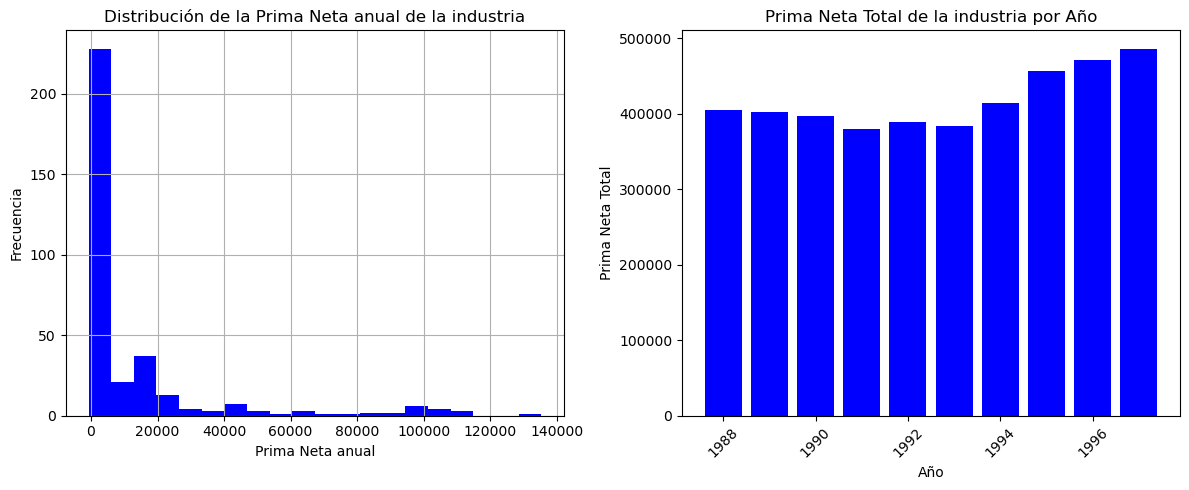

In [97]:
toggle_cell_code("Ocultar_2")
# Filtrar el DataFrame 'df' para mantener solo las filas donde 'AccidentYear' es igual a 'DevelopmentYear'
primas = df[df.AccidentYear == df.DevelopmentYear].copy()

# Calcular la suma de 'EarnedPremNet_F2' por 'DevelopmentYear'
sum_earned_premium_by_year = primas.groupby('DevelopmentYear')['EarnedPremNet_F2'].sum().reset_index()

# Crear una figura con dos subplots (1 fila, 2 columnas) con un tamaño de 12x5 pulgadas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primer subplot (axs[0]): Histograma de 'EarnedPremNet_F2'
axs[0].hist(primas['EarnedPremNet_F2'], bins=20, color='blue')  # Crear un histograma con 20 bins y color azul
axs[0].set_xlabel('Prima Neta anual')  # Etiqueta del eje x
axs[0].set_ylabel('Frecuencia')  # Etiqueta del eje y
axs[0].set_title('Distribución de la Prima Neta anual de la industria')  # Título del subplot
axs[0].grid(True)  # Agregar una cuadrícula al gráfico

# Segundo subplot (axs[1]): Gráfico de barras de la suma de 'EarnedPremNet_F2' por 'DevelopmentYear'
axs[1].bar(sum_earned_premium_by_year['DevelopmentYear'], sum_earned_premium_by_year['EarnedPremNet_F2'], color='blue')  # Crear un gráfico de barras
axs[1].set_xlabel('Año')  # Etiqueta del eje x
axs[1].set_ylabel('Prima Neta Total')  # Etiqueta del eje y
axs[1].set_title('Prima Neta Total de la industria por Año')  # Título del subplot
axs[1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()
plt.show()

* El histograma ilustra las primas netas anuales de las compañías. En él se evidencia que la mayoría de las empresas reciben primas anuales por debajo de los ___USD 20,000___. No obstante, algunas tienen una mayor participación en el mercado, superando los ___USD 100,000___ en ingresos anuales.

$\space$
* Aunque no se conoce la particularidad de cada compañía, el tamaño que ocupa cada una en el mercado se puede deber a que muchas de son pequeñas o funcionan en un mercado competitivo donde no pueden ejercer un poder de mercado. 

$\space$
* En el gráfico de barras se representa el ingreso anual por concepto de primas en toda la industria. Se aprecia una estabilidad  del sector entre 1988 y 1993, manteniéndose alrededor de los ___USD 400,000.___ Sin embargo, entre _1994_ y _1997_, experimentó un crecimiento significativo, aumentando aproximadamente en un ___25%___. 





### Primas por compañia

Codigo

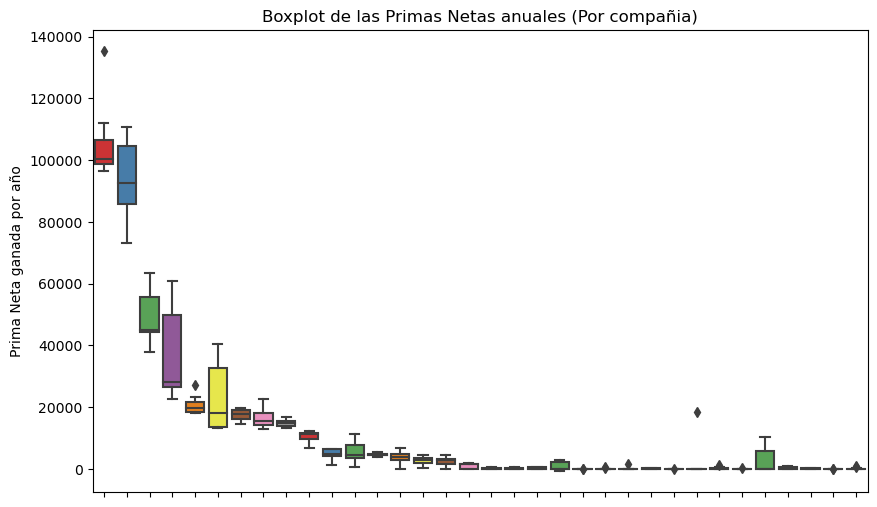

In [99]:
toggle_cell_code("Ocultar_3")
order = primas.groupby('GRNAME')['EarnedPremNet_F2'].median().sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=primas, x='GRNAME', y='EarnedPremNet_F2', palette='Set1', order=order)
plt.xlabel('')  # Eliminar etiqueta del eje x
plt.ylabel('Prima Neta ganada por año')  # Etiqueta del eje y
plt.title('Boxplot de las Primas Netas anuales (Por compañia)')  # Título del gráfico
boxplot.set_xticklabels([])
plt.show()

Cada caja representa una compañía, la cual muestra la distribución de las primas recibidas durante 10 años. Se observa que hay dos compañías que tienen una gran parte de las primas emitidas por la industria. Por otra parte, la mayoría de las compañías perciben primas anuales iguales o inferiores a ___USD 20.000___ anuales. 


En el gráfico, las dos compañías, ___Scpie Indemnity Co___ y ___Physicians Recip Insurers___, ubicadas en la parte izquierda, son clasificadas como parte del grupo "big", mientras que las demás se consideran dentro del grupo "small". Se destaca que estas dos aseguradoras, acaparan casi la mitad del mercado en términos de las primas generadas durante los últimos 10 años.

### ¿Qué cuota de mercado tiene las empresas ‘Big’ vs el grupo ‘Small’?

Codigo

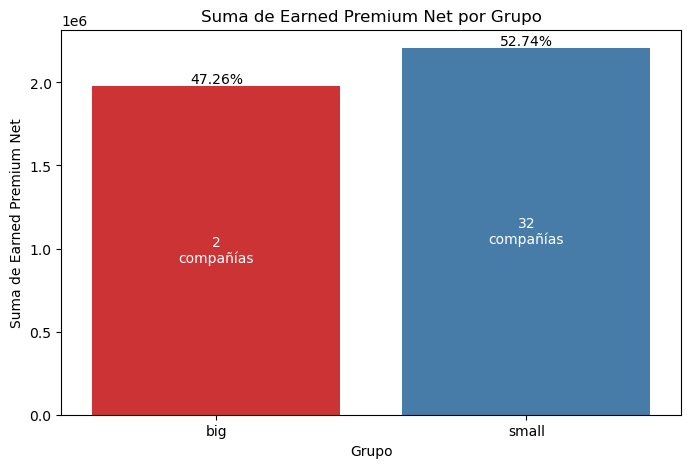

In [101]:
toggle_cell_code("Ocultar_4")
grupo_mapping = {
    'Scpie Indemnity Co': 'big',
    'Physicians Recip Insurers': 'big' }

primas = primas.copy()
primas['grupo'] = primas['GRNAME'].map(grupo_mapping).fillna('small')

# Calcular la suma de 'EarnedPremNet_F2' y el número de compañías diferentes por 'grupo'
grouped_data = primas.groupby('grupo')['EarnedPremNet_F2'].sum().reset_index()
grouped_data['Count'] = primas.groupby('grupo')['GRNAME'].nunique().values

# Calcular el porcentaje de 'EarnedPremNet_F2' en relación con el total
total_premium = grouped_data['EarnedPremNet_F2'].sum()
grouped_data['Percentage'] = (grouped_data['EarnedPremNet_F2'] / total_premium) * 100

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=grouped_data, x='grupo', y='EarnedPremNet_F2', palette='Set1')

# Personalizar etiquetas de ejes y título
plt.xlabel('Grupo')
plt.ylabel('Suma de Earned Premium Net')
plt.title('Suma de Earned Premium Net por Grupo')

# Agregar etiquetas de texto con el número de compañías en la mitad de las barras
for i, row in grouped_data.iterrows():
    ax.text(i, row['EarnedPremNet_F2'] / 2, f'{row["Count"]}\ncompañías', ha='center', va='center', color='white', fontsize=10)
    ax.text(i, row['EarnedPremNet_F2'] + 10, f'{row["Percentage"]:.2f}%', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico de barras
plt.show()


De las 34 compañías que registra el conjunto de datos, ___Scpie Indemnity Co___ y ___Physicians Recip Insurers___ son las únicas que figuran como compañías ‘Big’, estas dos acaparan el 47% de las primas emitidas durante los ultimos 10 años. Esto indicaría que estas dos compañías tienen un impacto significativo en el mercado, ejerciendo una considerable influencia en la generación de ingresos en comparación con el resto de las empresas del sector. Su destacada participación sugiere una presencia dominante que podría influir en las tendencias y estrategias dentro de la industria de seguros médicos y de responsabilidad profesional.

### ¿Qué compañías ceden más prima un reasegurador?

El reaseguro permite a las aseguradoras transferir una parte de los riesgos asumidos en sus pólizas a otras entidades, lo que les proporciona estabilidad financiera al diversificar y compartir riesgos. Esto les permite operar de manera más eficiente, mitigar pérdidas significativas en situaciones de siniestros masivos o catastroficos a causa de desastres naturales.

En este sentido, las aseguradoras seden un porcentaje de las primas percibidas junto con una porción de riesgo, este porcentaje dependerá del tipo de compañía, su tamaño y de cómo perciba el riesgo.

Es probable que las empresas más pequeñas compartan riesgos debido a su tamaño, ya que un evento de gran impacto podría generar pérdidas considerables e incluso poner en riesgo la existencia misma de la empresa. En contraste, las compañías más grandes o afiliadas a grupos empresariales suelen diversificar riesgos o contar con respaldo financiero, lo que les permite cubrir con mayor solidez los riesgos a los que se enfrentan.

In [102]:
toggle_cell_code("Ocultar_5")
grupo_primas = primas.groupby(['grupo', 'Single']).agg({'EarnedPremNet_F2': 'sum', 'EarnedPremCeded_F2': 'sum'}).reset_index()
grupo_primas['Porcetaje_Cedido'] = round(100*grupo_primas['EarnedPremCeded_F2']/grupo_primas['EarnedPremNet_F2'],2)
grupo_primas.rename(columns={"EarnedPremNet_F2": "Prima Neta", "EarnedPremCeded_F2": "Prima Cedida", "Porcetaje_Cedido":"Porcetaje Cedido"}, inplace=True)
grupo_primas['Single'] = grupo_primas['Single'].apply(lambda x: 'YES' if x == 1 else 'No')
grupo_primas

Codigo

,grupo,Single,Prima Neta,Prima Cedida,Porcetaje Cedido
0,big,No,1049205,53143,5.07
1,big,YES,928718,23389,2.52
2,small,No,599377,28551,4.76
3,small,YES,1607457,508106,31.61


## ¿Qué tan rentables son las compañías?
  
Se comparará el total de primas emitidas versus los costos incurridos durante los 10 años de historia (hasta el 1997). Es decir, lo pagado por siniestros ocurridos más lo que se espera pagar por siniestros reportados (que aún no se han pagado).

$$\text{Costos Incurridos}=\text{Pagos} + \text{reserva de avisados}$$

Considerando solo los pagos, se corre el riesgo de sobreestimar las ganancias. Para tener un panorama más realista, se adoptará la perspectiva del año 1997, esto implica que, por un lado, para 1988 la compañía ya ha liquidado la mayoría de los siniestros reportados, lo que resulta en una reserva de avisos baja comparado con los pagos. Sin embargo, para 1997 o años cercanos, la proporción de siniestros pagados es baja en comparación con la reserva de avisos, indicando que gran parte de los saldos se basan en estimaciones.

Codigo

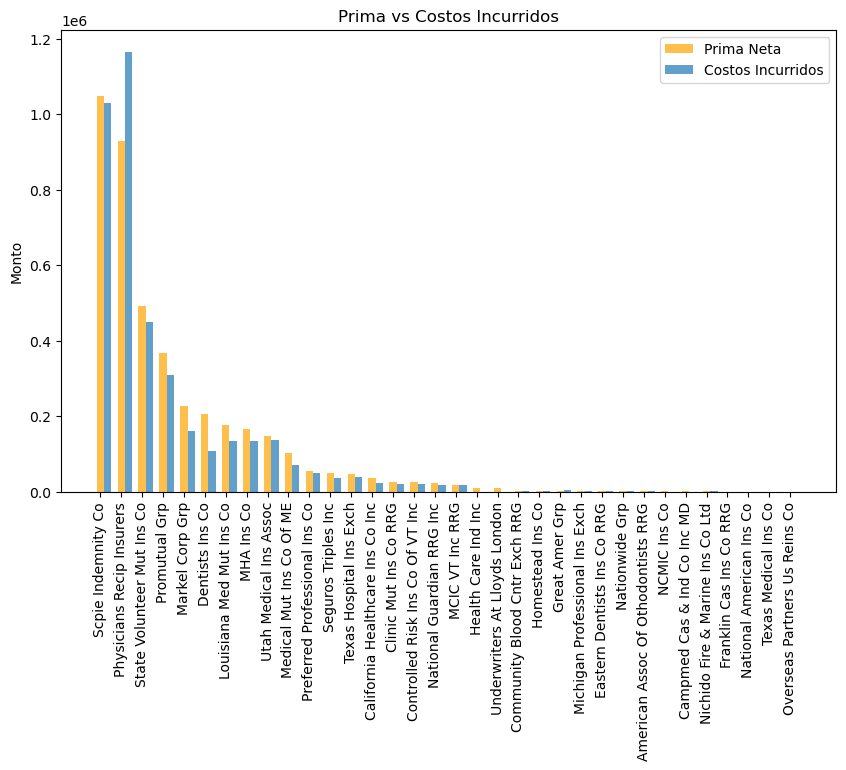

In [103]:
toggle_cell_code("Ocultar_6")
df_triangulo = df[(df['DevelopmentYear']==1997)].copy()
df_triangulo = df_triangulo[['GRNAME', 'AccidentYear', 'DevelopmentYear', 'IncurLoss_F2','CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremNet_F2']].copy()
grouped_data = df_triangulo.groupby('GRNAME').agg({'IncurLoss_F2': 'sum', 'EarnedPremNet_F2': 'sum'}).reset_index()
grouped_data_sorted = grouped_data.sort_values(by='EarnedPremNet_F2', ascending=False)
plt.figure(figsize=(10, 6))
num_groups = len(grouped_data_sorted['GRNAME'])
bar_width = 0.35
index_earned = range(num_groups)
index_incur = [i + bar_width for i in index_earned]
plt.bar(index_earned, grouped_data_sorted['EarnedPremNet_F2'], bar_width, label='EarnedPremNet_F2', alpha=0.7, color='orange')
plt.bar(index_incur, grouped_data_sorted['IncurLoss_F2'], bar_width, label='IncurLoss_F2', alpha=0.7)
plt.ylabel('Monto')
plt.title('Prima vs Costos Incurridos')
plt.xticks(index_earned, grouped_data_sorted['GRNAME'], rotation='vertical')
plt.legend(labels=['Prima Neta', 'Costos Incurridos'])
plt.show()

El gráfico muestra la comparativa entre las primas emitidas durante un periodo de 10 años y los pagos más las reservas de avisos (costos incurridos), organizados por tamaño de las compañías. Se nota que algunas empresas registran costos incurridos que superan el monto de las primas recibidas. Este patrón sugiere que, para el ramo de negligencia medica, el negocio no resulta rentable, ya que los gastos asociados superan los ingresos generados por las primas.

___¿Por qué decidir tener un ramo que no rentable?___

Las compañías no siempre encuentran cada uno de sus ramos rentables por sí mismos. Muchas veces, una aseguradora no solo se limita a un único nicho de mercado, sino que diversifica su cobertura a través de múltiples sectores como automovilístico, seguros generales, de vida, transporte, entre otros. En el caso de un ramo específico que no resulta rentable, la empresa podría optar por mantenerlo debido a que funciona como un atractivo para otros seguros que sí generan ganancias. Este enfoque estratégico contribuye a la rentabilidad general de la compañía, utilizando el ramo no rentable como un elemento de atracción que fortalece la rentabilidad global de la empresa.



## Chain Ladder

### Preparando los datos para desarrollo de IBNR

El IBNR (Incurred But Not Reported) se calcula y se utiliza en la industria de seguros para estimar las pérdidas incurridas, pero aún no reportadas a la compañía aseguradora. Esta reserva  es fundamental para comprender y estimar adecuadamente las reservas necesarias para cubrir las reclamaciones futuras.
El cálculo de IBNR implica el uso de métodos estadísticos y modelos actuariales que evalúan los patrones históricos de reclamaciones y el tiempo transcurrido entre la ocurrencia del evento asegurado y la presentación de la reclamación. Estas estimaciones ayudan a las aseguradoras a reservar fondos suficientes para pagar las reclamaciones futuras, garantizando que tengan la liquidez necesaria para cumplir con sus compromisos con los asegurados. Además, el IBNR es crucial para evaluar la solidez financiera y la estabilidad de una aseguradora.



Para este ejercicio, se utilizará unicamente los datos de la compañía __Scpie Indemnity Co__, filtrando la información disponible hasta el año 1997. Esto implica que 'eliminaremos' todos los registros de pagos posteriores a 1997, de manera que podamos construir el triángulo de datos que refleje específicamente la situación hasta ese año. 

Solo se usará una compañía, ya que estos ejercicios se hacen internamente e integrarlos con otras empresas podría contaminar la información.

#### Contrucción del triangulo de pagos

La siguiente matriz muestra los pagos de acuerdo con el periodo de ocurrencia y el periodo de aviso. Es decir, para la primera fila tenemos: 

- USD 2716.0 que corresponde al pago de siniestros en el 1988 y que ocurrieron ese mismo año. 
- USD 21860.0 pagos de siniestros pagados en 1989 que ocurrieron en el 1988. 

En este sentido, cada saldo se interpreta de acuerdo a la posición de la celda en la que se encuentre.  


In [105]:
toggle_cell_code("Ocultar_7")
df_Scpie = df[(df['GRCODE']==669) & (df['DevelopmentYear']<=1997)].copy()
dd = df_Scpie.groupby(["AccidentYear", "DevelopmentLag"]).agg({'CumPaidLoss_F2': ['max']})
dd.columns = ['Pagos']
dd = dd.reset_index()
pivot_data = dd.pivot(index='AccidentYear',columns='DevelopmentLag',values='Pagos').reset_index()

pivot_data_acom =pivot_data.set_index('AccidentYear')
pivot_data_diff =pivot_data_acom.diff(axis=1)
pivot_data_diff[1] = pivot_data_acom[1]
pivot_data_diff

Codigo

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,2716.0,21860.0,19414.0,15732.0,11297.0,5335.0,438.0,415.0,381.0,68.0
1989,3835.0,21323.0,19987.0,15186.0,7126.0,3364.0,948.0,316.0,-50.0,NaN
1990,4838.0,23127.0,22908.0,15527.0,5475.0,2880.0,421.0,74.0,NaN,NaN
1991,4456.0,29785.0,30496.0,14653.0,5075.0,2910.0,1744.0,NaN,NaN,NaN
1992,5970.0,30110.0,32188.0,13515.0,4293.0,1091.0,NaN,NaN,NaN,NaN
1993,9398.0,36812.0,30835.0,9253.0,5498.0,NaN,NaN,NaN,NaN,NaN
1994,6181.0,33023.0,30802.0,12379.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,7828.0,34528.0,28373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,8854.0,42546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Contrucción del triangulo de pagos acomulados

La siguiente matriz, muestra los pagos acumulados, es decir que la diagonal representa los pagos de siniestros ocurridos de acuerdo con cada año que se asocia en la fila. 

La idea con el ejercicio de ***Chain Ladder*** es poder estimar los valores que aun no tenemos (los $NaN$). Con ello nos haremos una idea de cuál es el pago que la compañia haria por los siniestros de cada año.  

In [107]:
toggle_cell_code("Ocultar_8")
pivot_data_acom

Codigo

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,2716.0,24576.0,43990.0,59722.0,71019.0,76354.0,76792.0,77207.0,77588.0,77656.0
1989,3835.0,25158.0,45145.0,60331.0,67457.0,70821.0,71769.0,72085.0,72035.0,NaN
1990,4838.0,27965.0,50873.0,66400.0,71875.0,74755.0,75176.0,75250.0,NaN,NaN
1991,4456.0,34241.0,64737.0,79390.0,84465.0,87375.0,89119.0,NaN,NaN,NaN
1992,5970.0,36080.0,68268.0,81783.0,86076.0,87167.0,NaN,NaN,NaN,NaN
1993,9398.0,46210.0,77045.0,86298.0,91796.0,NaN,NaN,NaN,NaN,NaN
1994,6181.0,39204.0,70006.0,82385.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,7828.0,42356.0,70729.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,8854.0,51400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Patron de pagos Acomulados

Codigo

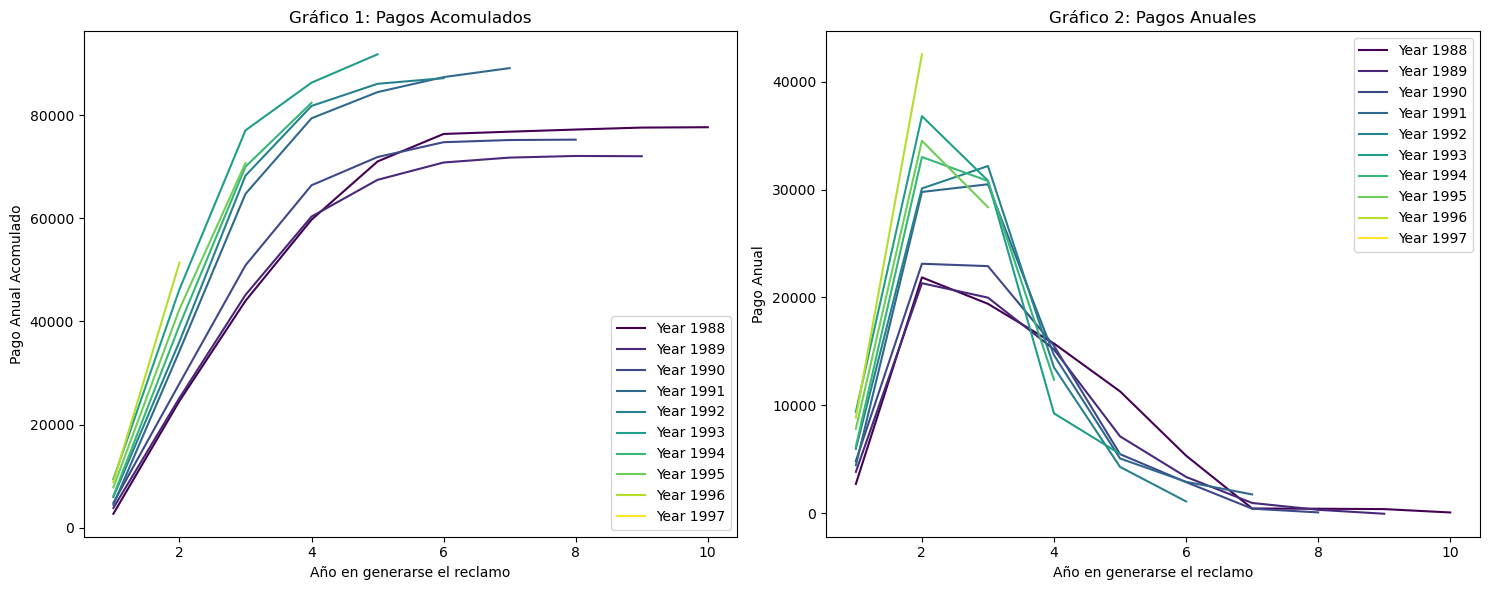

In [108]:
toggle_cell_code("Ocultar_9")
pivot_data_acom =pivot_data.set_index('AccidentYear')
pivot_data_diff =pivot_data_acom.diff(axis=1)
pivot_data_diff[1] = pivot_data_acom[1]
num_rows = len(pivot_data_diff)
colors = plt.cm.viridis(np.linspace(0, 1, num_rows))
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

for i, (index, row) in enumerate(pivot_data_acom.iterrows()):
    axs[0].plot(row.index, row.values, label=f'Year {index}', color=colors[i])

axs[0].set_xlabel('Año en generarse el reclamo')
axs[0].set_ylabel('Pago Anual Acomulado')
axs[0].set_title('Gráfico 1: Pagos Acomulados')
axs[0].legend()

for i, (index, row) in enumerate(pivot_data_diff.iterrows()):
    axs[1].plot(row.index, row.values, label=f'Year {index}', color=colors[i])

axs[1].set_xlabel('Año en generarse el reclamo')
axs[1].set_ylabel('Pago Anual')
axs[1].set_title('Gráfico 2: Pagos Anuales')
axs[1].legend()
plt.tight_layout()
plt.show()

En la izquierda se encuentra los pagos acumulados año a año de siniestros que fueron ocurrido en uno en particular para la compañía Scpie Indemnity Co. Se observa que el comportamiento creciente de estos pagos se da hasta aproximadamente el año 4, a partir de ahí los pagos son relativamente marginales. Esto se puede ver en el grafico de la derecha que al llegar al año 10 el valor pagado no es muy representativo. 

Además, se observa otro patrón: los siniestros ocurridos en años más recientes tienden a presentar un valor acumulado más elevado. Esta tendencia podría atribuirse al hecho de que la compañía emite más polizas año a año, lo que conlleva a una mayor exposición y, por ende, a montos de siniestros mas altos. 


### Modelo chain ladder

#### Triangulo de Entreno 

Este triangulo muestra los pagos acumulados de cada uno de cada uno de los años a medida que pasa el tiempo. Hay un histórico de 10 años. 

In [118]:
toggle_cell_code("Ocultar_10")
def triangulo(df, grcode, entreno):
    
    if entreno:
        df_trinagulo = df[(df['GRCODE']== grcode ) & (df['DevelopmentYear']<=1997)].copy()
    else: 
        df_trinagulo = df[(df['GRCODE']== grcode )].copy()
        
    df_g         = df_trinagulo.groupby(["AccidentYear", "DevelopmentLag"]).agg({'IncurLoss_F2': ['max']})
    df_g.columns = ['Pagos']
    df_g         = df_g.reset_index()
    pivot_data   = df_g.pivot(index='AccidentYear',columns='DevelopmentLag',values='Pagos').reset_index()
    pivot_data   = pivot_data.drop('AccidentYear', axis=1).cumsum(axis=1)
    
    return pivot_data


triangulo_entreno = triangulo(df, grcode=669, entreno=True)
triangulo_entreno

Codigo

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
0,121905.0,234116.0,337342.0,436941.0,532947.0,623434.0,706074.0,786480.0,865400.0,943911.0
1,122679.0,235844.0,345881.0,447023.0,537840.0,619759.0,697250.0,770827.0,843543.0,NaN
2,118157.0,235654.0,352031.0,451926.0,541178.0,623094.0,702228.0,778561.0,NaN,NaN
3,117981.0,240424.0,361480.0,475275.0,578105.0,676176.0,771046.0,NaN,NaN,NaN
4,131059.0,261214.0,385409.0,499383.0,606200.0,705382.0,NaN,NaN,NaN,NaN
5,134700.0,265457.0,390710.0,505427.0,616721.0,NaN,NaN,NaN,NaN,NaN
6,136749.0,264941.0,386296.0,498173.0,NaN,NaN,NaN,NaN,NaN,NaN
7,140962.0,273367.0,391699.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,134473.0,263453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,137944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Factores de Desarrollo

Los factores de desarrollo se utilizan para estimar la cantidad de reclamaciones que se producirán en los años futuros. Estos factores se calculan dividiendo la cantidad de reclamaciones que se produjeron en un año determinado por la cantidad de reclamaciones que se produjeron en el año anterior.

![Vida de una Reserva](triangulo.jpg)

- Para nuestro ejercicio, el primer factor sale como resultado de dividir la suma de la columna $2$ del recuadro rojo   sobre la columna $1$ del recuadro rojo. 

- Para el segundo factor se divide la suma de la columna $3$ del recuadro verde sobe la suma de los numero del recuadro verde que están en la columna $2$. 

- Asi mismo, el noveno factor es el resultado de dividir los recuadros azules de la columna 10 y 9. 

Los factores que se mencionaron anteriormente $f_i$ solo reflejan lo que sucede de un año a otro. Para poder entender cuanto es el valor acumulado para el año 10 del año 9. Se deben multiplicar cada uno de los factores de los años restantes. Es decir: 

- Para el año 9 el factor de desarrollo es: $F_9=f_1\cdot f_2\cdot \cdot \cdot f_9$
- Para el año 8 el factor de desarrollo es: $F_8=f_2\cdot f_3\cdot \cdot \cdot f_9$
- Para el año 7 el factor de desarrollo es: $F_7=f_3\cdot f_4\cdot \cdot \cdot f_9$
- Para el año 2 el factor de desarrollo es: $F_2=f_8 \cdot f_9$
- Para el año 1 el factor de desarrollo es: $F_1=f_9$



La siguiente tabla muestra los valores de desarrollo, lo que indica que:  los siniestros pagados al año 9 se deben multiplicar por 7.88 para completar las responsabilidades. Para el año 8 son 4.01 veces, etc. 


In [123]:
toggle_cell_code("Ocultar_11")
def F_j(triangulo_entreno, con_cola):
    n_ori, n_dev = triangulo_entreno.shape
    R_j = []
    for j in range(n_ori-1):
        R_j .append(sum(triangulo_entreno.iloc[0:(n_ori-1-j), j+1])/sum(triangulo_entreno.iloc[0:(n_ori-1-j), j]))
    F_j = []
    
    if con_cola:
        if R_j[8]>1:
            R_j[8] = R_j[8] + (R_j[8]-1)/1## Factor de cola
    
    for j in range(n_ori-1):
        F_j.append(np.prod(R_j[j:]))
    F_j.append(1)
    
    return F_j

Fj = F_j(triangulo_entreno=triangulo_entreno, con_cola=False)
pd.DataFrame({'Perido': [10-1-t for t in range(len(Fj))], 'Factor': Fj})

Codigo

,Perido,Factor
0,9,7.889085
1,8,4.018873
2,7,2.738881
3,6,2.114934
4,5,1.744980
5,4,1.502361
6,3,1.327852
7,2,1.196927
8,1,1.090722
9,0,1.000000


### Ultimate

Corresponde al valor estimado de los pagos acomulados al final del año 10. Es decir que si las estimaciones son consistentes, al final de 10 años se pagará USD 943911 por siniestros ocurridos en 1988 y 920071 por siniestros ocurridos en 1989. En otras palabras los saldos que se muestran ahison los pagos estimados al año 2007. que no es mas que el factor de desarrollo multiplicado por la diagonal del triangulo de pagos acomulados. 



In [112]:
toggle_cell_code("Ocultar_12")
def ultimate(triangulo_entreno, con_cola):
    n_ori, n_dev = triangulo_entreno.shape
    ultimate = []
    Fj = F_j(triangulo_entreno,con_cola)
    for j in range(n_ori):
        ultimate.append(triangulo_entreno.iloc[j,n_ori-1-j]*Fj[n_ori-1-j])
    return ultimate

ult = ultimate(triangulo_entreno=triangulo_entreno, con_cola=False)

pd.DataFrame({'Perido': [t+1 for t in range(len(ult))], 'Ultimate': [round(s,3) for s in ult]})

Codigo

,Perido,Ultimate
0,1,943911.000
1,2,920071.085
2,3,931880.327
3,4,1023835.331
4,5,1059738.542
5,6,1076166.044
6,7,1053603.203
7,8,1072817.096
8,9,1058784.241
9,10,1088251.965


#### Pagos en t=0

La siguiente tabla refleja los pagos hechos al año 1997 de los siniestros que ocurrieron en ese mismo año y años anteriores. Es decir, la diagonal de la matriz de pagos acumulados.  


In [124]:
toggle_cell_code("Ocultar_13")
def pagado_0(triangulo_prueba):
    n_ori, n_dev = triangulo_prueba.shape
    pagado_0 = []
    
    for j in range(n_ori):
        pagado_0.append(triangulo_prueba.iloc[j,n_ori-1-j])
    return pagado_0


t_p = triangulo(df, grcode=669, entreno=False)
pg_0 = pagado_0(triangulo_prueba = t_p)

pd.DataFrame({'Perido': [t+1 for t in range(len(pg_0))], 'Pagado': [round(s,3) for s in pg_0]})

Codigo

,Perido,Pagado
0,1,943911
1,2,843543
2,3,778561
3,4,771046
4,5,705382
5,6,616721
6,7,498173
7,8,391699
8,9,263453
9,10,137944


### Cálculo de IBNR y validación

El IBNR se calcula como los estimado a pagar al final del periodo 10 menor lo que se ha pagado hasta el momento. Es decir, el Ultimate – (Pagos en t=0). 

La siguiente tabla muestra el 	valor pagado después de 10 años y el IBNR calculado. Para este caso el IBNR calculado es superior al valor pagado, es decir que la reserva fue suficiente. Es importante mencionar que para efector regulatorios la reserva no debe ser muy superior pero tampoco muy baja, esto por dos razones:

- Si la reserva es muy alta, podría indicar que la empresa no está optimizando sus recursos, ya que ese capital podría haberse utilizado para otras inversiones o proyectos. Además, podría haber riesgos de fraude fiscal, ya que las reservas suelen tener descuentos en impuestos.

- Por otro lado, si la reserva es demasiado baja, puede generar problemas regulatorios. Esto puede surgir debido a la percepción de suficiencia financiera por parte de las entidades reguladoras que supervisan a las aseguradoras.


In [114]:
toggle_cell_code("Ocultar_14")
def pagado_n(triangulo_prueba):
    n_ori, n_dev = triangulo_prueba.shape
    pagado_n = list(triangulo_prueba[n_ori])
    return pagado_n

def ibnr_pagado(df, grcode, con_cola):
    triangulo_entreno = triangulo(df = df, grcode = grcode,entreno= True)
    triangulo_prueba  = triangulo(df = df, grcode = grcode,entreno= False)

    df_IBNR = pd.DataFrame()
    df_IBNR['pagado_0'] = pagado_0(triangulo_prueba)
    df_IBNR['pagado_n'] = pagado_n(triangulo_prueba)
    df_IBNR['ultimate'] = ultimate(triangulo_entreno, con_cola)
    df_IBNR['saldo_pagado'] = df_IBNR['pagado_n']  - df_IBNR['pagado_0']
    df_IBNR['ibnr'] = df_IBNR['ultimate'] - df_IBNR['pagado_0']
    df_ibnr = pd.DataFrame()
    df_ibnr['GRCODE'] = [grcode]
    df_ibnr['PAGADO'] = [round(sum(df_IBNR['saldo_pagado']))]
    df_ibnr['IBNR']   = [round(sum(df_IBNR['ibnr']))]
    return df_ibnr


ibnr_pagado(df, grcode=669, con_cola=True)

Codigo

,GRCODE,PAGADO,IBNR
0,669,4246735,5050930



Los resultados obtenidos muestran que para la compañía __Scpie Indemnity Co__ la reserva para para los siniestros incurridos pero que aún no han sido avisados para el año 1997 y con una cobertura de 10 años  tiene un valor estimado de USD 5.050.930, además comparándola con los pagos realizados al final del año 2007 observa que hay una sobrereserva de $5.050.930-4.246.735 = 804.195$, Equivalente un 18% más del valor de los pagos.  


### IBNR para varias compañias


Dado que tenemos un conjunto de datos para diferentes compañías, a continuación, se mostrará el calculo de IBNR y se comparará con el valor pagado para diversos compañías del sector de seguros de  negligencia médica. Es decir, los pagos nos servirán  como un backtesting y revisar que tan buena es la estimación del IBNR mediante la metodología de Chain Ladder


#### Metodología normal

Usando la misma metodología anterior, se puede ver que no todas las compañías logran ser suficientes y muchas están reservando menos de lo que se debería.  

In [115]:
toggle_cell_code("Ocultar_115")
GRCODE = list(set(df['GRCODE']))
resultado = pd.DataFrame()
for grcode in GRCODE:
    if( triangulo(df, grcode, True).iloc[0,9]!=0 ) and (triangulo(df, grcode, False).iloc[9,9]!=0):
        ibnr_pago = ibnr_pagado(df, grcode, False)
        resultado = pd.concat([resultado, ibnr_pago], axis=0)
resultado['Diferencia_porc'] = (resultado['PAGADO']/resultado['IBNR']-1)*100
resultado['Estado'] = resultado.apply(lambda row: 'Insuficiencia' if row['PAGADO'] > row['IBNR'] else 'Sobrereserva', axis=1)
resultado

Codigo

,GRCODE,PAGADO,IBNR,Diferencia_porc,Estado
0,32514,175495,147680,18.834642,Insuficiencia
0,43656,594348,553140,7.449832,Insuficiencia
0,36234,324356,258384,25.532541,Insuficiencia
0,40975,428158,419558,2.049776,Insuficiencia
0,33049,2279786,1917716,18.880272,Insuficiencia
0,669,4246735,4278626,-0.745356,Sobrereserva
0,683,1377449,1090027,26.368338,Insuficiencia
0,7854,898025,755135,18.922444,Insuficiencia
0,36277,328082,281473,16.558959,Insuficiencia
0,36676,663684,534984,24.056794,Insuficiencia


#### Metodología asumiendo factor de cola

El "factor de cola"  es un ajuste que se hace para mejorar la estimación de la reserva cuando esta se desarrolla más allá de los años históricos que se tienen. Es decir que será útil para aquellas compañías que después de 10 años aún  siguen pagando siniestros.   

Dado lo anterior, el factor de cola ayuda a que varias compañías logren ser suficientes con las reservas, sin embargo, otras logran quedar con déficit de reserva. En estos casos, lo mejor será evaluar la metodología y considerar hacer cambios que o usar otros modelos para mejorar las estimaciones. 

In [116]:
toggle_cell_code("Ocultar_16")
GRCODE = list(set(df['GRCODE']))
resultado = pd.DataFrame()
for grcode in GRCODE:
    if( triangulo(df, grcode, True).iloc[0,9]!=0 ) and (triangulo(df, grcode, False).iloc[9,9]!=0):
        ibnr_pago = ibnr_pagado(df, grcode, True)
        resultado = pd.concat([resultado, ibnr_pago], axis=0)
resultado['Diferencia_porc'] = (resultado['PAGADO']/resultado['IBNR']-1)*100
resultado['Estado'] = resultado.apply(lambda row: 'Insuficiencia' if row['PAGADO'] > row['IBNR'] else 'Sobrereserva', axis=1)
resultado

Codigo

,GRCODE,PAGADO,IBNR,Diferencia_porc,Estado
0,32514,175495,176734,-0.701054,Sobrereserva
0,43656,594348,647221,-8.169234,Sobrereserva
0,36234,324356,292302,10.966056,Insuficiencia
0,40975,428158,496736,-13.805724,Sobrereserva
0,33049,2279786,2218054,2.783160,Insuficiencia
0,669,4246735,5050930,-15.921721,Sobrereserva
0,683,1377449,1286582,7.062667,Insuficiencia
0,7854,898025,852513,5.338570,Insuficiencia
0,36277,328082,320784,2.275051,Insuficiencia
0,36676,663684,618438,7.316174,Insuficiencia


## Modelo de regresión para estimar el IBNR. 

El modelo de regresión usa los datos del triángulo no acumulativo y hace una transformación para poder hacer el modelo lineal. El cual considera: 
$E(Z_{ij})=U_i S_j$

Donde: 
- $Z_{ij}$ es el pago del siniestro en el año $i$ que ocurrio en el $j$.
- $U_i$ es el parámetro de la fila
- $S_j$ es el parámetro de la columna 

Ademas $\sum_{j=1}^t=1$

la tranfromación de un modelo multiplicativo a uno aditivo es de la siguiente forma: 

$E(Y_{ij}=\mu+\alpha_i+\beta_j$, donde $E(Y_{ij})=log(Z_{ij})$, ademas $\alpha_1=\beta_1=0$

Al $\alpha_1=\beta_1=0$ y como tenemos un histórico de 10 años, nos quedan 18 covariables mas el intercepto, por tanto el modelo de regresión seria el siguiente: 

$$log(Z_{ij})=Y_{ij}=\mu+\sum_{i=2}^{10}\alpha_i+\sum_{j=2}^{10}\beta_j$$


In [194]:
def columnas(valores,variable):
    y = [re.findall("\\d+", j)[0] for j in valores]
    y = [int(i) for i in y]
    todas = list(set(y))
    df = pd.DataFrame()
    df[f"y_{variable}"] = y
    for k in todas:
        #print(k)
        df[f"{variable}_{k}"] = ([1 if k == j else 0 for j in y])
    return df

def matrix_X(df_triangulo):
    k = len(df_triangulo.columns)
    alpha = [f'a_{i}' for i in range(1,k+1)]
    mu    = [f'u_{i}' for i in range(1,k+1)]
    lists = [alpha, mu]
    df    = pd.DataFrame(list(itertools.product(*lists)), columns=['a', 'u'])

    alpha    = columnas(valores  = df.a, variable = 'a')
    mu       = columnas(valores=df.u, variable = 'u')
    df_col= pd.concat([alpha, mu], axis=1)


    df_col['y_a'] = df_col['y_a'].astype(str) + df_col['y_u'].astype(str) 
    df_col['y_a'] = [int(i) for i in df_col['y_a']]
    df_col = df_col.drop(['y_u', 'u_1'], axis=1)
    df_col['a_1'] = 1
    df_col.rename(columns={'a_1': 'b0'}, inplace=True)
    df_col.rename(columns={'y_a': 'y_ii'}, inplace=True)
    #df_col = df_col.drop(['y_ii'], axis=1)
    return df_col


def matrix_y(df_triangulo):
    k = len(df_triangulo.columns)
    d0 = pd.DataFrame()
    for i in range(k):
        for j in range(k):
            d1 = pd.DataFrame({'y_ii': [int(f'{i+1}{j+1}')], 'Y': [math.log(df_triangulo.iloc[i, j])]})
            d0 = pd.concat([d0, d1], axis=0)
    return d0

def triangulo(df, grcode, entreno):
    
    if entreno:
        df_trinagulo = df[(df['GRCODE']== grcode ) & (df['DevelopmentYear']<=1997)].copy()
    else: 
        df_trinagulo = df[df['GRCODE']== grcode].copy()
        
    df_g         = df_trinagulo.groupby(["AccidentYear", "DevelopmentLag"]).agg({'IncurLoss_F2': ['max']})
    df_g.columns = ['Pagos']
    df_g         = df_g.reset_index()
    pivot_data   = df_g.pivot(index='AccidentYear',columns='DevelopmentLag',values='Pagos').reset_index()
    pivot_data   = pivot_data.drop('AccidentYear', axis=1).cumsum(axis=1)
    
    return pivot_data



def entreno_prueba(df_trg_entreno, df_trg_prueba):

    Y = matrix_y(df_trg_entreno)
    X = matrix_X(df_trg_entreno)

    Y_X           = pd.merge(X,Y, on='y_ii', how='left')
    data_entreno  = Y_X[Y_X['Y'].notna()]
    data_entreno  = data_entreno.drop(['y_ii'], axis=1)

    Y_prueba      = matrix_y(df_trg_prueba)                   
    x_prueba      = Y_X[Y_X['Y'].isna()].drop(['Y'], axis=1)

    data_prueba_  = pd.merge(Y_prueba, x_prueba, on='y_ii', how='inner')
    data_prueba_  = data_prueba_[data_prueba_['u_10']==1]
    data_prueba   = data_prueba_.drop(['y_ii'], axis=1)
    
    y_ii          = data_prueba_['y_ii']

    x_entreno = data_entreno.drop('Y', axis=1)  # Features
    y_entreno = data_entreno['Y']  # Target variable
    x_prueba  = data_prueba.drop('Y', axis=1)  # Features
    y_prueba  = data_prueba['Y']  # Target variable
    
    return x_entreno, y_entreno, x_prueba, y_prueba


def pagado_0(triangulo_prueba):
    n_ori, n_dev = triangulo_prueba.shape
    pagado_0 = []
    
    for j in range(n_ori):
        pagado_0.append(triangulo_prueba.iloc[j,n_ori-1-j])
    pagado_0.pop(0)
    return pagado_0



def escalar_0_1(y_entreno, y_prueba):
    
    min = np.min(pd.concat([y_entreno, y_prueba]))
    max = np.max(pd.concat([y_entreno, y_prueba]))
    y_entreno_scal = (y_entreno - min)/(max -  min)
    y_prueba_scal  = (y_prueba - min)/(max -  min)
    return y_entreno_scal, y_prueba_scal

import math

def matrix_y(df_triangulo):
    k = len(df_triangulo)
    d0 = pd.DataFrame(columns=['y_ii', 'Y'])
    
    for i in range(k):
        for j in range(k):
            value = df_triangulo.iloc[i, j]
            if value > 0:  # Verificar si el valor es positivo
                d1 = pd.DataFrame({'y_ii': [int(f'{i+1}{j+1}')], 'Y': [math.log(value)]})
                d0 = pd.concat([d0, d1], axis=0)
    
    return d0

toggle_cell_code("Ocultar_17")

Codigo

#### conjunto de entreno y prueba: 

Como conjunto de entreno se toma el triangulo de pagos por tanto tenemos un total de 55 registros y 10 columnas. Para el conjunto de prueba el ideal es estimar para cada año el valor acumulado pagado. Por tanto, solo tendremos 10 registros, los equivalentes a la última columna de la siguiente tabla. 

In [206]:
df_trg_entreno = triangulo(df, grcode=669, entreno=True)
df_trg_prueba  = triangulo(df, grcode=669, entreno=False)
x_entreno, y_entreno, x_prueba, y_prueba = entreno_prueba(df_trg_entreno, df_trg_prueba)
toggle_cell_code("Ocultar_18")
df_trg_prueba

Codigo

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
0,121905,234116,337342,436941,532947,623434,706074,786480,865400,943911
1,122679,235844,345881,447023,537840,619759,697250,770827,843543,915860
2,118157,235654,352031,451926,541178,623094,702228,778561,854173,929523
3,117981,240424,361480,475275,578105,676176,771046,862108,952601,1042946
4,131059,261214,385409,499383,606200,705382,797970,888970,978226,1067477
5,134700,265457,390710,505427,616721,714735,811607,907321,1003338,1099385
6,136749,264941,386296,498173,594325,685827,776325,868195,960043,1051981
7,140962,273367,391699,491749,580558,662918,744904,826791,908587,990369
8,134473,263453,377098,481371,580647,678429,775711,873449,971050,1068301
9,137944,265671,379728,486729,588872,688537,788479,888447,988037,1087415


#### Métrica de desempeño:

La métrica de desempeño estará dada por la insuficiencia o sobre reserva:
- i la reserva de IBNR es superior al valor pagado en un 10% diremos que hay sobre reserva.
- Si la reserva de IBNR es inferior al valor pagado en 10% diremos que hay insuficiencia. 
- Si la reserva de IBNR no se encuentra entere los dos intervalos anteriores, diremos que la reserva es aceptable y el metodo de regresión es valido para hacer la estimación.  

La siguiente tabla muestra: 

- $pago_0$: diagonal de la matriz pagos.
- $pago_n$	: valor pagado al final de los 10 años.
- $pago_hat$ pago estimado al final de los 10 años. 
- $pago_restante$: $pago_n- pago_0$
- $pago_ibnr$: $pago_hat - pago_0$



In [212]:
model = LinearRegression()
model.fit(x_entreno, y_entreno)
y_pred = model.predict(x_prueba)
df_val = pd.DataFrame()

df_val['pago_0'] = pagado_0(df_trg_prueba)
df_val['pago_n'] = [round(math.exp(i)) for i in y_prueba]
df_val['pago_hat'] = [round(math.exp(i)) for i in y_pred]

df_val['pago_restante'] = df_val['pago_n'] - df_val['pago_0']
df_val['pago_ibnr'] = df_val['pago_hat'] - df_val['pago_0']

toggle_cell_code("Ocultar_19")
df_val

Codigo

,pago_0,pago_n,pago_hat,pago_restante,pago_ibnr
0,843543,915860,944589,72317,101046
1,778561,929523,948371,150962,169810
2,771046,1042946,995517,271900,224471
3,705382,1067477,1056973,362095,351591
4,616721,1099385,1074308,482664,457587
5,498173,1051981,1070012,553808,571839
6,391699,990369,1101699,598670,710000
7,263453,1068301,1067099,804848,803646
8,137944,1087415,1095866,949471,957922


Dado lo anterior tenemos: 
$$Metrica=100\%(\frac{\sum_{j=0}^{8}\text{pago_restante}(j)}{\sum_{j=0}^{8}\text{pago_ibnr}(j)}-1)=2.38\%$$

En este sentido, la reserva solo se desvía en un 3\% del pago realizado. esto indica que el modelo es adecuado para los datos y es una buena estimación para la reserva.

# LOOCV - Leave One Out Coss Validation

Para este ejercicio: 

- Se usarán 14 compañías, la información se normalizará para que no hayan problema de escala. 
- Se tomará la información de 13 y se estimará los pagos para la restante. 
- El proceso se repetirá hasta que pasen todas.

En la siguiente tabla se mostrarán los resultados de pagos restantes, reserva de IBNR y la métrica de desempeño para cada compañia.

In [228]:
GRCODE = list(set(df['GRCODE']))
GRCODE_aptos = []

for cod in GRCODE:
    trg  = triangulo(df, grcode=cod, entreno=False)
    apto = (trg.loc[0, 10] != 0) and (trg.loc[9,1] !=0)
    #print(cod)
    if apto:
        GRCODE_aptos.append(cod)
        
df_data_aptos  = df[df['GRCODE'].isin(GRCODE_aptos)]

errores = []
for id_ in range(len(GRCODE_aptos)):
    cod = GRCODE_aptos[id_]
    df_trg_entreno_t = triangulo(df, grcode=cod, entreno=True)
    df_trg_prueba_t  = triangulo(df, grcode=cod, entreno=False)
    x_entreno_t, y_entreno_t, x_prueba_t, y_prueba_t = entreno_prueba(df_trg_entreno_t, df_trg_prueba_t)
    y_entreno_scal_t, y_prueba_scal_t = escalar_0_1(y_entreno_t, y_prueba_t)       

    min_t = np.min(pd.concat([y_entreno, y_prueba]))
    max_t = np.max(pd.concat([y_entreno, y_prueba]))
    
    y_entr_concat    = pd.Series([0])
    x_entreno_concat = pd.DataFrame()


    for j in GRCODE_aptos:
    
        if j!=cod:
            df_trg_entreno = triangulo(df, grcode=j, entreno=True)
            df_trg_prueba  = triangulo(df, grcode=j, entreno=False)
            x_entreno, y_entreno, x_prueba, y_prueba = entreno_prueba(df_trg_entreno, df_trg_prueba)
            y_entreno_scal, y_prueba_scal = escalar_0_1(y_entreno, y_prueba)
            y_entr_concat = pd.concat([y_entr_concat, y_entreno_scal])
            x_entreno_concat = pd.concat([x_entreno_concat, x_entreno])
            #print(x_entreno.shape[0], len(y_entreno_scal))
    y_entr_concat = y_entr_concat.iloc[1:]


    model = LinearRegression()
    model.fit(x_entreno_concat, y_entr_concat)
    y_pred_scal = model.predict(x_prueba_t)
    y_pred_t  = [(max_t- min_t)*p + min_t   for p in y_pred_scal.tolist()]
    y_prueba_t  = [(max_t- min_t)*p + min_t   for p in y_prueba_scal_t.tolist()]

    df_val = pd.DataFrame()

    df_val['pago_0'] = pagado_0(df_trg_prueba)
    df_val['pago_n'] = [round(math.exp(i)) for i in y_prueba_t]
    df_val['pago_hat'] = [round(math.exp(i)) for i in y_pred_t]

    df_val['pago_restante'] = df_val['pago_n'] - df_val['pago_0']
    df_val['pago_ibnr'] = df_val['pago_hat'] - df_val['pago_0']
    df_val['pago_diff'] = (df_val['pago_ibnr']/df_val['pago_restante'] - 1)*100

    error = (sum(df_val['pago_ibnr'])/sum(df_val['pago_restante'])-1)*100

    errores.append(error)

    
errores_abs = [abs(i) for i in errores]

codig = 683
pago_ibnr     = []
GRCODE        = []
pago_restante = []
for codig in GRCODE_aptos:
    df_trg_entreno = triangulo(df, grcode=codig, entreno=True)
    df_trg_prueba  = triangulo(df, grcode=codig, entreno=False)
    x_entreno, y_entreno, x_prueba, y_prueba = entreno_prueba(df_trg_entreno, df_trg_prueba)
    model = LinearRegression()#LinearRegression()
    model.fit(x_entreno, y_entreno)
    y_pred = model.predict(x_prueba)


    df_val = pd.DataFrame()

    df_val['pago_0'] = pagado_0(df_trg_prueba)
    df_val['pago_n'] = [round(math.exp(i)) for i in y_prueba]
    df_val['pago_hat'] = [round(math.exp(i)) for i in y_pred]

    df_val['pago_restante'] = df_val['pago_n'] - df_val['pago_0']
    df_val['pago_ibnr'] = df_val['pago_hat'] - df_val['pago_0']
    df_val['pago_diff'] = (df_val['pago_ibnr']/df_val['pago_restante'] - 1)*100
    #print(f'{codig}: (IBNR/Pago)% :', (sum(df_val['pago_ibnr'])/sum(df_val['pago_restante'])-1)*100,"%")
    pago_ibnr.append(sum(df_val['pago_ibnr']))
    GRCODE.append(codig)
    pago_restante.append(sum(df_val['pago_restante']))
    #print(sum(df_val['pago_restante']))

df_resultado_RL = pd.DataFrame()
df_resultado_RL['GRCODE'] = GRCODE
df_resultado_RL['IBNR_LM'] = pago_ibnr
df_resultado_RL['PAGO'] = pago_restante
#df_resultado_RL['pago_restante'] = pago_restante
toggle_cell_code("Ocultar_20")
df_resultado_RL['Diff_porce']=(df_resultado_RL['PAGO']/df_resultado_RL['IBNR_LM'] - 1)*100
df_resultado_RL


Codigo

,GRCODE,IBNR_LM,PAGO,Diff_porce
0,32514,145407,175495,20.692264
1,43656,519805,594348,14.340570
2,36234,218997,324356,48.109791
3,40975,414577,428158,3.275869
4,33049,1789310,2279786,27.411460
5,669,4347912,4246735,-2.327025
6,683,1190162,1377449,15.736261
7,7854,559894,898025,60.391967
8,36277,293761,328082,11.683307
9,36676,446792,663684,48.544289


### conclusión:
- Los modelos de chain Lader como los de regresión poder ser tiles al momento de hacer la estimación de la reserva. Sin embargo, hay que entender los datos y asignar el modelo apropiado.

- Al generalizar la información y estimar los saldos de una compañía en función de otras, particularmente para este tiempo de problemas no es lo mas apropiado. Se puede pensar que entre compañías la información es independiente y tiene patrones de pagos muy diferentes.  Por tanto, un ejercicio de LOOCV no es la forma de abordar el problema. 

- Ya con la estructura para el modelo de regresión, es posible optar por otros modelos como árboles, modelos Lasso, etc para tener otras estimaciones. 
